# Chapter 1. 다음 실시간 검색어 크롤링


## requests

In [1]:
# Crawling에 필요한 모듈 (코랩이 아닌 상황에서는 pip install requests를 해야함)
import requests

print(requests)  # 모듈 이름과 모듈이 설치된 경로 확인 가능

<module 'requests' from '/usr/local/lib/python3.10/dist-packages/requests/__init__.py'>


In [2]:
# requests.get : get 요청을 보내는 기능
# 우리가 요청을 보내면 SERVER에서 응답을 해줌

print(requests.get)  # function get -> get이라는 이름의 함수

<function get at 0x7ff4b421a0e0>


In [3]:
url = "https://search.daum.net/search?w=tot&q=%EB%8B%A4%EC%9D%8C%20%EC%8B%A4%EC%8B%9C%EA%B0%84%20%EA%B2%80%EC%83%89%EC%96%B4&nzq=%EC%8B%A4%EC%8B%9C%EA%B0%84%20%EA%B2%80%EC%83%89%EC%96%B4&DA=RSJ"
url

'https://search.daum.net/search?w=tot&q=%EB%8B%A4%EC%9D%8C%20%EC%8B%A4%EC%8B%9C%EA%B0%84%20%EA%B2%80%EC%83%89%EC%96%B4&nzq=%EC%8B%A4%EC%8B%9C%EA%B0%84%20%EA%B2%80%EC%83%89%EC%96%B4&DA=RSJ'

In [4]:
requests.get(url)
print(requests.get(url))

# 응답 200 -> 200은 보통 '성공'을 의미 -> 성공적으로 응답했다는 말

<Response [200]>


In [ ]:
response = requests.get(url)  # 응답값
print(response.text)  # response에서 text를 가져와줘

In [6]:
# response에는 text외에도 많음
# print(response.url)
# print(response.content)
# print(response.encoding)
# print(response.headers)
# print(response.json)
# print(response.links)
# print(response.ok)
# print(response.status_code)

## BeautifulSoup

### BeautifulSoup 이해하기 (의미있는 데이터)

In [7]:
from bs4 import BeautifulSoup

In [ ]:
print(BeautifulSoup(response.text, 'html.parser'))
# reponse.text를 html.parser로 의미있는 데이터로 만든 뒤 BeautifulSoup통에 넣음

In [ ]:
# BeautifulSoup 통에 넣은 데이터가 의미를 가지고 있기 때문에 다양한 기능을 사용할 수 있음
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.title)
print(soup.title.string)
print(soup.span)
print(soup.findAll("span"))

### 의미있는 데이터 중 필요한 데이터(실시간 검색어) 가져오기

In [10]:
# 응답 받은 html을 편하게 볼 수 있게 파일로 저장
file = open('daum.html','w')   # daum.html로 저장하겠다.
file.write(response.text)
file.close()

# 이렇게 실행하면 daum.html이라는 파일이 생성됨

### 실시간 검색어 가져오기

In [ ]:
# html에서 a태그 모두 가져오기
print(soup.findAll('a'))

In [15]:
# soup야~ 내가 보낸 링크에서 a태그 중에 link_favorsch만 가져와줘~
print(soup.findAll('a', 'link_favorsch'))
results = soup.findAll('a', 'link_favorsch')

[]


### 가져온 실시간 검색어를 예쁘게 출력하기

In [18]:
for result in results :
  print(result.get_text(), '\n')

In [20]:
# 순위 매기기
rank = 1

for result in results :
  print(rank,'위: ', result.get_text(), '\n')
  rank += 1

### 실시간 검색어의 날짜 표시

In [23]:
# 실시간 검색어의 날짜 표시하기

from datetime import datetime

print(datetime.today())
print(datetime.today().strftime("%y년 %m월 %d일의 실시간 검색어 순위"))

2023-05-12 02:16:41.278216
23년 05월 12일의 실시간 검색어 순위


##파일로 출력하기
* open('파일명', '모드')

* 모드
1. r - read : 읽기전용 모드(쓰기, 수정 불가)
2. w - write : 쓰기모드(기존내용에 덮음)
3. a - append : 추가모드(기존내용 보존)

In [24]:
search_rank_file = open('rankresult.txt', 'w')

for result in results :
  search_rank_file.write(str(rank) + '위 :' + result.get_text())
  print(rank,'위: ', result.get_text(), '\n')
  rank += 1

search_rank_file.close()

# 이렇게 실행하면 rankresult 파일이 생성됨

In [25]:
# 이 전 저장했던 파일 뒤에 새로운 실검을 또 저장하고 싶다면?
search_rank_file = open('rankresult.txt', 'a')  # append모드로 변경 후 실행

for result in results :
  search_rank_file.write(str(rank) + '위 :' + result.get_text())
  print(rank,'위: ', result.get_text(), '\n')
  rank += 1

search_rank_file.close()

# Chapter 2. 네이버 실시간 검색어 크롤링



In [34]:
# 20대 연령의 실시간 검색어
url = "https://datalab.naver.com/keyword/realtimeList.naver?age=20s"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [35]:
# 실검은 span - item_title에 있음
results = soup.findAll('span','item_title')
results

[]

In [36]:
response.text

'<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n    <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,minimum-scale=1.0,user-scalable=no">\n    <meta name="description" lang="ko" content="네이버 :: 서비스에 접속할 수 없습니다.">\n    <title>[접근 오류] 서비스에 접속할 수 없습니다.</title>\n    <style type="text/css">\n        /* PC */\n        body,p,h1,h2,h3,h4,h5,h6,ul,ol,li,dl,dt,dd,table,th,td,form,fieldset,legend,input,textarea,button,select{margin:0;padding:0}\n        body,input,textarea,select,button,table{font-size:12px;font-family:\'굴림\',Gulim,helvetica,sans-serif;color:#424242}\n        body,html{height:100%}\n        img,fieldset{border:0}\n        img{vertical-align:middle}\n        ul,ol{list-style:none}\n        em,address{font-style:normal}\n        a{color:#000;text-decoration:none}\n        legend{display:none}\n        hr{display:none !important}\n        #u_skip{position:relative;width:100%;z

* **특정 웹사이트에서는 불법으로 크롤링하는 로봇을 방지하기 위해 접근을 막아놓음**

In [37]:
# 나는 로봇이 아니고 잠깐 크롤링을 하는 일개 시민이야~ 
# headers에 내 정보를 넣어서 보내기
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

In [38]:
# 위에서 적은 headers를 넣어주기
url = "https://datalab.naver.com/keyword/realtimeList.naver?age=20s"
response = requests.get(url, headers = headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [40]:
response.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="utf-8">\n    <!-- [D] Internet Explorer Document Mode 최신으로 설정 -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>페이지를 찾을 수 없습니다. : 빅데이터포털</title>\n    <style type="text/css">\n        /* NHN Technology Services MJH 151228 */\n        /* Common */\n        html, body { height: 100%; }\n        body, p, h1, h2, h3, h4, h5, h6, ul, ol, li, dl, dt, dd, table, th, td, form, fieldset, legend, input, textarea, button, select { margin: 0; padding: 0; }\n        body{ background: #3a3d40; font-family: \'나눔고딕\',NanumGothic,\'돋움\',Dotum,Helvetica,sans-serif; font-size: 16px; color: #404d5d; letter-spacing: -1px; }\n        a { color: inherit; text-decoration: none; }\n        .blind { overflow: hidden; position: absolute; clip: rect(0 0 0 0); width: 1px; height: 1px; margin: -1px; }\n        .sp,\n        .sp_before:before { background-image: url(https://ssl.pstatic.net/static.datalab/202303080631/img/sp_error.

## 네이버 영화 순위 크롤링

* 내가 해본거

In [29]:
# 20대 연령의 실시간 검색어
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%98%81%ED%99%94+%EC%88%9C%EC%9C%84&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EB%AC%B4%EB%B9%84&tqi=ia2Dzwp0J14ssEE5NL0ssssstzZ-177750"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [33]:
# 찾아보니 url에서 영화이름은 strong태그에 name에 있음
results = soup.findAll('strong', 'name')
results

[<strong class="name">가디언즈 오브 갤럭시: Vo...</strong>,
 <strong class="name">슈퍼 마리오 브라더스</strong>,
 <strong class="name">드림</strong>,
 <strong class="name">극장판 짱구는 못말려: 동물...</strong>,
 <strong class="name">존 윅 4</strong>,
 <strong class="name">스즈메의 문단속</strong>,
 <strong class="name">옥수역귀신</strong>,
 <strong class="name">더 퍼스트 슬램덩크</strong>,
 <strong class="name">리바운드</strong>,
 <strong class="name">울지마 엄마</strong>,
 <strong class="name">킬링 로맨스</strong>,
 <strong class="name">바람개비</strong>,
 <strong class="name">클로즈</strong>,
 <strong class="name">2001 스페이스 오디세이</strong>,
 <strong class="name">칠중주: 홍콩 이야기</strong>,
 <strong class="name">송암동</strong>,
 <strong class="name">리턴 투 서울</strong>,
 <strong class="name">80일간의 세계일주</strong>,
 <strong class="name">무명</strong>,
 <strong class="name">블레이드 러너</strong>,
 <strong class="name">파벨만스</strong>,
 <strong class="name">항구의 니쿠코짱!</strong>,
 <strong class="name">개를 훔치는 완벽한 방법</strong>,
 <strong class="name">튤립 모양</strong>,
 <strong class="name">자

# Chapter 3. 날씨 정보 가져오기

## API

* **나와 친구가 전화할 때**

[ 나 --- 전화기 --- 친구 ]

나와 친구를 연결해주는 인터페이스는 전화기

* **내가 컴퓨터를 사용할 때**

[ 나 -- 마우스, 키보드 --- 컴퓨터 ]

나와 컴퓨터를 연결해주는 인터페이스는 마우스,키보드

* **클라이언트와 서버 사이**

[ Client --- API --- Server ]

클라이언트와 서버 사이를 연결해주는 인터페이스는 API


* **API를 만든다**

사용자가 필요로 하는 기능을 만들고 서버에 올린 뒤에 특정한 규약에 따라 사용할 수 있게 하는 것

* **API를 사용한다**

누군가가 만들어둔 기능을 특정한 규약에 따라 사용하는 것 

## API Key

* 대체 내가 만든 API를 누가 사용하고 있는걸까?

* 앞으로는 방명록을 쓴 사람만 사용할 수 있게 해야겠어~

* API Key: 내가 OpenAPI 좀 사용할게~!

* 동명이인이 있을 수 있으니 개인마다 고유한 Key값을 가지고 있음

### Openweathermap API Key 발급

https://home.openweathermap.org

## 요청을 보낼 API 링크 만들기

* https://openweathermap.org/current#one

In [45]:
# Openweathermap에서 가져온 API 링크
# {} 안에 필요한 파라미터들을 넣어줘야함
api = 'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}'

In [48]:
# 필요한 파라미터 준비하기
city = 'Seoul'
apikey= '53eb0b8e15d5981770d6bcdfec829b92'
api = 'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}'
print(api)

http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}


In [49]:
# f-string으로 api url안에 준비한 파라미터 넣기
api = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}'
print(api)

# 우리가 만든 url로 요청을 보내면
# Openweathermap에서 내가 요청한 링크에 맞는 응답값을 보내줌

http://api.openweathermap.org/data/2.5/weather?q=Seoul&appid=53eb0b8e15d5981770d6bcdfec829b92


## 요청 보내기

In [51]:
import requests

result = requests.get(api)
print(result)
print(result.text)

<Response [200]>
{"coord":{"lon":126.9778,"lat":37.5683},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":296.3,"feels_like":295.53,"temp_min":291.84,"temp_max":298.81,"pressure":1017,"humidity":33},"visibility":10000,"wind":{"speed":1.54,"deg":260},"clouds":{"all":0},"dt":1683866713,"sys":{"type":1,"id":8105,"country":"KR","sunrise":1683836769,"sunset":1683887451},"timezone":32400,"id":1835848,"name":"Seoul","cod":200}


In [53]:
# 위에서 받은 결과를 예쁘게 출력하기

# result 타입 확인해보기
print(type(result.text))

<class 'str'>


## json
* json : java script object notation

* python 내장 함수

* 데이터를 주고 받을 때 사용하는 포맷

* json 형태 (딕셔너리와 닮음)

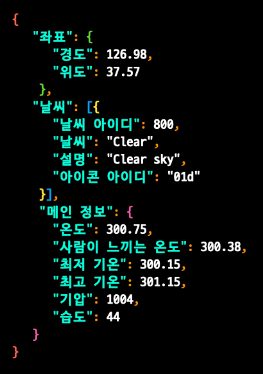

전체 딕셔너리 안에 '좌표'라는 key가 있다. '좌표'안에 또 하나의 딕셔너리로 경도, 위도의 key값고 value값이 있음

In [55]:
import json

# 일반 문자열을 json 형태로 바꾸려면
# json.loads(str) -> str에는 변경을 원하는 일반 문자열을 넣으면 됨

data = json.loads(result.text)

print(type(result.text))
print(type(data))

<class 'str'>
<class 'dict'>


In [71]:
# json에서 원하는 값 가져와 프린트해보기
print(data['name'],'의 날씨입니다.')
print('날씨는',data['weather'][0]['main'],'입니다.')
print('현재 온도는',data['main']['temp'],'도 입니다.')   # 화씨로 되어있음
print('체감 온도는',data['main']['feels_like'],'도 입니다.')  # 화씨로 되어있음
print('최저 기온은',data['main']['temp_min'],'도 입니다.')
print('최고 기온은',data['main']['temp_max'],'도 입니다.')
print('습도는',data['main']['humidity'],'입니다.')
print('기압은',data['main']['pressure'],'입니다.')
print('풍향은',data['wind']['deg'],'입니다.')
print('풍속은',data['wind']['speed'],'입니다.')

Seoul 의 날씨입니다.
날씨는 Clear 입니다.
현재 온도는 296.3 도 입니다.
체감 온도는 295.53 도 입니다.
최저 기온은 291.84 도 입니다.
최고 기온은 298.81 도 입니다.
습도는 33 입니다.
기압은 1017 입니다.
풍향은 260 입니다.
풍속은 1.54 입니다.


In [73]:
# 날씨를 구체적으로 나타내기 - weather의 description
print(data['name'],'의 날씨입니다.')
print('날씨는',data['weather'][0]['description'],'입니다.')
print('현재 온도는',data['main']['temp'],'도 입니다.')   # 화씨로 되어있음
print('체감 온도는',data['main']['feels_like'],'도 입니다.')  # 화씨로 되어있음
print('최저 기온은',data['main']['temp_min'],'도 입니다.')
print('최고 기온은',data['main']['temp_max'],'도 입니다.')
print('습도는',data['main']['humidity'],'입니다.')
print('기압은',data['main']['pressure'],'입니다.')
print('풍향은',data['wind']['deg'],'입니다.')
print('풍속은',data['wind']['speed'],'입니다.')

Seoul 의 날씨입니다.
날씨는 clear sky 입니다.
현재 온도는 296.3 도 입니다.
체감 온도는 295.53 도 입니다.
최저 기온은 291.84 도 입니다.
최고 기온은 298.81 도 입니다.
습도는 33 입니다.
기압은 1017 입니다.
풍향은 260 입니다.
풍속은 1.54 입니다.


## 언어 변경하기

In [79]:
# 한국어로 나올 수 있도록 언어 변경하기
# api 주소에 언어 파라미터 추가

lang = 'kr'
api = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}&lang={lang}'
result = requests.get(api)
data = json.loads(result.text)


print(data['name'],'의 날씨입니다.')
print('날씨는',data['weather'][0]['description'],'입니다.')

# 한글로 출력됨

Seoul 의 날씨입니다.
날씨는 온흐림 입니다.


## 온도 단위 변경하기

In [80]:
# url 뒤에 units=metric 파라미터 추가
api = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}&lang={lang}&units=metric'

result = requests.get(api)
data = json.loads(result.text)


print(data['name'],'의 날씨입니다.')
print('날씨는',data['weather'][0]['description'],'입니다.')
print('현재 온도는',data['main']['temp'],'도 입니다.')
print('체감 온도는',data['main']['feels_like'],'도 입니다.')

# 온도 단위 변경됨

Seoul 의 날씨입니다.
날씨는 튼구름 입니다.
현재 온도는 24.3 도 입니다.
체감 온도는 23.62 도 입니다.


## 날씨 정보 가져오기 (Full Code)

In [46]:
import requests
import json

city = "Seoul"
apikey = '53eb0b8e15d5981770d6bcdfec829b92'
lang = "kr"

api = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={apikey}&lang={lang}&units=metric"

result = requests.get(api)
data = json.loads(result.text)

print(data["name"],"의 날씨입니다.")
print("날씨는 ",data["weather"][0]["description"],"입니다.")
print("현재 온도는 ",data["main"]["temp"],"입니다.")
print("하지만 체감 온도는 ",data["main"]["feels_like"],"입니다.")
print("최저 기온은 ",data["main"]["temp_min"],"입니다.")
print("최고 기온은 ",data["main"]["temp_max"],"입니다.")
print("습도는 ",data["main"]["humidity"],"입니다.")
print("기압은 ",data["main"]["pressure"],"입니다.")
print("풍향은 ",data["wind"]["deg"],"입니다.")
print("풍속은 ",data["wind"]["speed"],"입니다.")

Seoul 의 날씨입니다.
날씨는  맑음 입니다.
현재 온도는  23.02 입니다.
하지만 체감 온도는  22.24 입니다.
최저 기온은  20.69 입니다.
최고 기온은  24.66 입니다.
습도는  33 입니다.
기압은  1017 입니다.
풍향은  260 입니다.
풍속은  1.54 입니다.


# Chapter 4. 번역기 프로그램

## Googletrans

* **언어 감지 / 번역 기능을 가진 모듈**

* 언어 감지 및 번역 Library

**[ 언어 감지 ]**

안녕하세요 --> 한국어

Hello --> 영어

**[ 번역 ]**

안녕하세요 --> Hello

Lion --> 사자

In [14]:
# pip install googletrans는 detect() 오류가 생겨서
# 최신 버전으로 설치해줘야함
!pip install googletrans==4.0.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from googletrans import Translator

## 언어 감지하기
1. 번역기를 만든다.
2. 언어 감지를 원하는 문장을 설정한다.
3. 언어를 감지한다.

### 1. 번역기를 만든다.

In [17]:
translator = Translator()

### 2. 언어 감지를 원하는 문장 설정

In [18]:
# Translator의 detect 함수 사용

sentence = '안녕하세요. 코드라이언입니다.'
detected = translator.detect(sentence)
print(detected)
print(detected.lang)

Detected(lang=ko, confidence=None)
ko


### 3. 언어 감지하기

In [19]:
# 사용자에게 sentence를 입력받아서 언어 감지하기

sentence = input('감지할 언어를 입력하세요. :')
detected = translator.detect(sentence)
print(detected.lang)

감지할 언어를 입력하세요. :안녕
ko


## 3. 번역하기

1. 번역기를 만든다.
2. 번역을 원하는 문장을 설정한다.
3. 번역을 원하는 언어를 설정한다.
4. 번역한다.

### 1. 번역기를 만든다.

* translator : 번역기
* translate : 번역하다.
* translate(text, dest, src)

text : 번역을 원하는 문장

dest : 어떤 언어로 번역할 것인지(ko, eg 등)

src : 소스의 준말 (생략 가능)

In [44]:
from googletrans import Translator

translator = Translator()

sentence = '안녕하세요. 코드라이언입니다.'

result = translator.translate(sentence, 'en')
detected = translator.detect(sentence)
print(result)

Translated(src=ko, dest=en, text=hello.Code Ryan., pronunciation=None, extra_data="{'confiden...")


In [45]:
# 보기 좋게 출력하기

print('---------- 출 력 결 과 -----------')
print(detected.lang,':',sentence)
print(result.dest,':',result.text)
print('----------------------------------')

---------- 출 력 결 과 -----------
ko : 안녕하세요. 코드라이언입니다.
en : hello.Code Ryan.
----------------------------------


In [50]:
# 사용자에게 입력 받은 문장을 번역하기

sentence = input('번역할 문장을 입력하세요 :')

result = translator.translate(sentence, 'en')
result2 = translator.translate(sentence, 'fr')  # 불어
result3 = translator.translate(sentence, 'es')  # 스페인어

detected = translator.detect(sentence)

print('---------- 출 력 결 과 -----------')
print(detected.lang,':',sentence)
print(result.dest,':',result.text)
print(result2.dest,':',result2.text)
print(result3.dest,':',result3.text)
print('----------------------------------')

번역할 문장을 입력하세요 :안녕
---------- 출 력 결 과 -----------
ko : 안녕
en : hi
fr : Salut
es : Hola
----------------------------------


In [56]:
# 1. 번역을 원하는 문장 받기
# 2. 어느 나라 번역으로 원하는지 받기

sentence = input('번역할 문장을 입력하세요 :')
dest = input('어떤 언어로 번역할까요? :')

result = translator.translate(sentence, dest)

detected = translator.detect(sentence)

print('---------- 출 력 결 과 -----------')
print(detected.lang,':',sentence)
print(result.dest,':',result.text)
print('----------------------------------')

번역할 문장을 입력하세요 :hi
어떤 언어로 번역할까요? :ko
---------- 출 력 결 과 -----------
en : hi
ko : 안녕
----------------------------------


# Chapter 5. Python으로 메일 보내기

## 사전 준비
1. gmail의 IMAP 사용 설정 -> 허용으로 변경
2. google ID -> 보안수준이 낮은 액세스 허용

## SMTP
* Simple Mail Transfer Protocol

* 간단하게 메일을 보내기 위한 약속

* Email Client(나) --- SMTP ---> Email Server(내꺼)

* Email Server(내꺼) <--- SMTP ---> Email Server(상대)

* Email Server(상대) --- IMAP ---> Email Client(상대)


* **SMTP 서버를 이용해서 우리가 원하는 곳으로 메일을 보낼 수 있다.**

* SMTP Server
→ 내 주소는 smtp.gamil.com동 465번지야~
(Address: smtp.gmail.com / Port : 465)

* smtplib
: SMTP를 쉽게 사용할 수 있도록 만든 라이브러리


* 메일을 보내기 위한 절차
1. SMTP 메일 서버를 연결한다.
2. SMTP 메일 서버에 로그인한다.
3. SMTP 메일 서버로 메일을 보낸다.

### 1. SMTP 메일 서버를 연결한다.

In [57]:
# python 내장함수인 smtplib 사용
import smtplib

# SMTP(서버주소, 포트번호)
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465   # gmail의 포트는 gmail에서 지정해서 변경불가 -> 465


smtp = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
print(smtp)

# 커넥션이 닫혀있다는 에러가 뜸

SMTPServerDisconnected: ignored

In [71]:
# SMTP(서버주소, 포트번호)
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465   # gmail의 포트는 gmail에서 지정해서 변경불가 -> 465

# SMTP 뒤에 _SSL 을 추가해주면 커넥션 오류가 뜨지 않음
smtp = smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT)
print(smtp)

### 2. SMTP 메일 서버에 로그인한다.

In [72]:
# smtp.login(ID, PW)
print(smtp.login('syur997@likelion.org', 'dvgusqhd2033!'))

(235, b'2.7.0 Accepted')


In [60]:
# smtp.login(ID, PW) - 잘못된 정보를 입력했을 때
print(smtp.login('syur997@likelion.org', 'password'))

(503, b'5.5.1 MAIL first. n14-20020ab0540e000000b0077190a66ab1sm1363328uaa.27 - gsmtp')


### 3. SMTP 메일 서버로 메일 보내기

In [70]:
# smtp.send_message - 메일 보내기
smtp.send_message()

# 연결 끊기
smtp.quit()

TypeError: ignored

## MIME

* 나 : '안녕'이라고 메일 보내줘~
* SMTP : 뭔소리야
→ SMTP는 영어 외에 지원하지 않음
→ MIME를 사용해야 SMTP가 이해할 수 있음

## email.message() 모듈 사용

1. 이메일을 만든다.
2. 이메일에 내용을 담는다.
3. 발신자, 수신자를 설정한다.

In [73]:
# email.message() 모듈 사용
from email.message import EmailMessage

In [74]:
# 1. 이메일을 만든다.
message = EmailMessage()

# 2-1. 이메일에 내용을 담는다.
message.set_content('코드라이언 수업중~')

# 2-2. 이메일 제목 쓰기 (Header)
message['Subject'] = '이건 제목'

# 3. 발신자, 수신자를 설정한다.
message['From'] = 'syur997@likelion.org'
message['To'] = 'syur997@likelion.org'

## 메일 전송하기

In [75]:
# smtp는 MIME로 변형해주어야 보낼 수 있기 때문에
# 위에서 MIME로 변형한 message를 send_message()안에 넣어주면 됨
smtp.send_message(message)

# 연결 끊기
smtp.quit()

(221,
 b'2.0.0 closing connection v20-20020a67c014000000b0042c457166d8sm2707366vsi.0 - gsmtp')

## 메일에 사진 첨부하기

* rb : read binary
* wb : write binary
* ab : append binary

In [79]:
# 이미지 파일 불러오기
image = open('머핀앤너츠.jpg', 'rb')
print(image.read())
# binary 형태로 print 값을 반환함

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00\x84\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc2\x00\x11\x08\x02\xee\x02\xee\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x004\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x07\x04\x05\x06\x03\x08\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xb0Z~w\xa8\x9b\x88\x03\x13\x10\xdcX\xa5\x16\nQ\x1ah\x92q\r~\xca\xbc\xd2\xbc\xed\xd3\xc2\xf7=\x15`gq5!\x80&%4\x0c@\xc4\xd0Rwg\x0b\xa57\xdb\x8a\xea\xc4\xe7\xb3B\xca\xcd0LD\xaa\x8e\x87\xd3\xa7\x1e\x9fa\x16\xd50\x04I1`\x80\x08\x02&u\xb5M\xd3Ri\x9d\xaa\xb9\xfe\x8f\x96\xe8j\x92\x08\x1b\x10\x08$\x85\x06\xc2Q\x02MJ#A\x12\xdcZ\x01\xc5$\xa2\xd0\xd0\t\

In [81]:
# close 없이 안전하게 파일 열기
# with문 사용

with open('머핀앤너츠.jpg', 'rb') as image :
  image_file = image.read()

print(image_file)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00\x84\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc2\x00\x11\x08\x02\xee\x02\xee\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x004\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x07\x04\x05\x06\x03\x08\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xb0Z~w\xa8\x9b\x88\x03\x13\x10\xdcX\xa5\x16\nQ\x1ah\x92q\r~\xca\xbc\xd2\xbc\xed\xd3\xc2\xf7=\x15`gq5!\x80&%4\x0c@\xc4\xd0Rwg\x0b\xa57\xdb\x8a\xea\xc4\xe7\xb3B\xca\xcd0LD\xaa\x8e\x87\xd3\xa7\x1e\x9fa\x16\xd50\x04I1`\x80\x08\x02&u\xb5M\xd3Ri\x9d\xaa\xb9\xfe\x8f\x96\xe8j\x92\x08\x1b\x10\x08$\x85\x06\xc2Q\x02MJ#A\x12\xdcZ\x01\xc5$\xa2\xd0\xd0\t\

In [84]:
# add_attachment(...)
# 안전하게 파일 보내기

# message.add_attachment(image_file, maintype = 'image', subtype='')
# subtype을 매번 변경하기 번거로우니 파이썬 모듈 사용하기

import imghdr

image_type = imghdr.what('머핀앤너츠', image_file)
print(image_type)

jpeg


In [ ]:
# 메일 내용에 이미지 추가
message.add_attachment(image_file, maintype = 'image', subtype=image_type)

## 이미지 첨부하여 메일 보내기(Full Code)

In [85]:
# SMTP(서버주소, 포트번호)
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 465   # gmail의 포트는 gmail에서 지정해서 변경불가 -> 465

# SMTP 뒤에 _SSL 을 추가해주면 커넥션 오류가 뜨지 않음
smtp = smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT)

# smtp.login(ID, PW)
print(smtp.login('syur997@likelion.org', 'dvgusqhd2033!')) 

# 1. 이메일을 만든다.
message = EmailMessage()

# 2-1. 이메일에 내용을 담는다.
message.set_content('코드라이언 수업중~')

# 2-2. 이메일 제목 쓰기 (Header)
message['Subject'] = '이건 제목'

# 3. 발신자, 수신자를 설정한다.
message['From'] = 'syur997@likelion.org'
message['To'] = 'syur997@likelion.org'

# 메일 내용에 이미지 추가
message.add_attachment(image_file, maintype = 'image', subtype=image_type)

# 메일 보내기
smtp.send_message(message)

# 연결 끊기
smtp.quit()

(235, b'2.7.0 Accepted')


(221,
 b'2.0.0 closing connection e28-20020a67d81c000000b004344ac17007sm2645100vsj.22 - gsmtp')

## 이메일 유효성 확인하기

**정규표현식**

* ^ : 처음
* $ : 끝
* [a-zA-Z0-9.+_-] : 소문자 a-z까지, 대문자 A-Z까지, 숫자 0-9까지, ., +, _, -
* [ ]+ : 뒤에 +는 앞의 []가 1회 이상 반복된다는 의미 (1글자 이상이라는 말)

* @[ ] : [ ]앞에 @가 붙어야함
* \\. : 일반 문자로써의 .을 의미 (그냥 .만 넣으면 정규표현식의 기능으로 사용됨)
* [a-zA-Z]{2, 3} : a-z, A-Z까지가 최소 2회, 최대 3번 반복된다.

In [98]:
import re

# 유효한 이메일인지 확인해보기
# match(정규표현식, 확인할 이메일 주소)
reg = "^[a-zA-Z0-9.+_-]+@[a-zA-Z0-9]+\.[a-zA-Z]{2,3}$"
print(re.match(reg,"codelion.example@gmail.com"))

# 정규표현식 조건에 맞지 않은 메일 주소를 쓰면 None이 반환됨

<re.Match object; span=(0, 26), match='codelion.example@gmail.com'>


In [99]:
# 함수 생성(유효한 메일 주소인지 확인)

def sendEmail(addr) :
  reg = "^[a-zA-Z0-9.+_-]+@[a-zA-Z0-9]+\.[a-zA-Z]{2,3}$"
  if bool(re.match(reg, addr)) :
    smtp.send_message(message)
    print('정상적으로 메일이 발송되었습니다.')
  else :
    print('이메일 주소가 유효하지 않습니다.')

In [ ]:
# 함수 사용
sendEmail('codelion.example@gmail.com')